In [422]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [423]:
train=pd.read_csv(r'/content/drive/MyDrive/data vidhya/Black Friday Sales Prediction/train.csv')
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [424]:
train.shape

(550068, 12)

In [425]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [426]:
#check data types
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [427]:
#statistical info
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [428]:
train.apply(lambda x:len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [429]:
cat_cols=[]
for i in train.columns:
  if train.dtypes[i]=='object':
    cat_cols.append(i)

In [430]:
for col in cat_cols:
  print(col)
  print(train[col].value_counts())
  print()

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00065942       1
P00238842       1
P00211742       1
P00027842       1
P00126342       1
Name: Product_ID, Length: 3631, dtype: int64

Gender
M    414259
F    135809
Name: Gender, dtype: int64

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

City_Category
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64



# EDA

## Univarient

In [431]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Text(0.5, 1.0, 'Countplot For Gender')

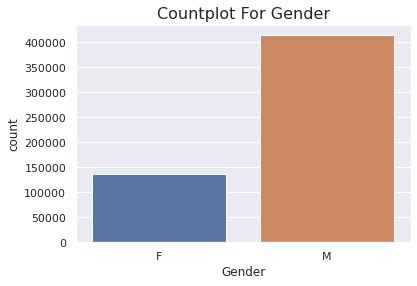

In [432]:
sns.countplot(train['Gender'])
plt.title('Countplot For Gender',fontsize=16)

Text(0.5, 1.0, 'Count Plot for Age')

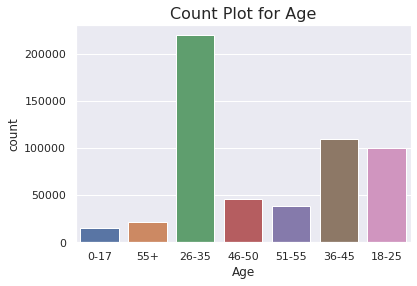

In [433]:
sns.countplot(train['Age'])
plt.title('Count Plot for Age',fontsize=16)

Text(0.5, 1.0, 'Count Plot for City Category')

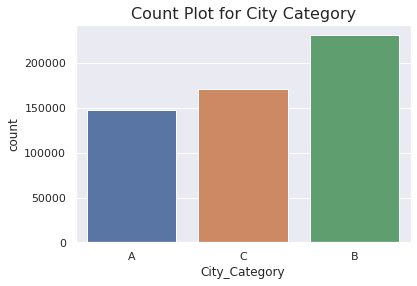

In [434]:
sns.countplot(train['City_Category'])
plt.title('Count Plot for City Category',fontsize=16)

Text(0.5, 1.0, 'Count Plot for Stay_In_Current_City_Years  ')

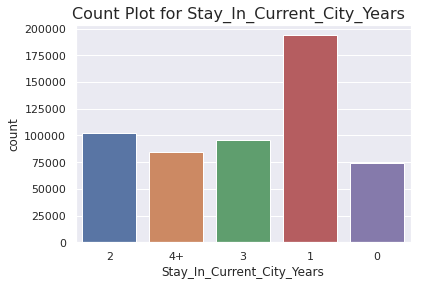

In [435]:
sns.countplot(train['Stay_In_Current_City_Years'])
plt.title('Count Plot for Stay_In_Current_City_Years  ',fontsize=16)

Text(0.5, 1.0, 'Distribution of Purchase')

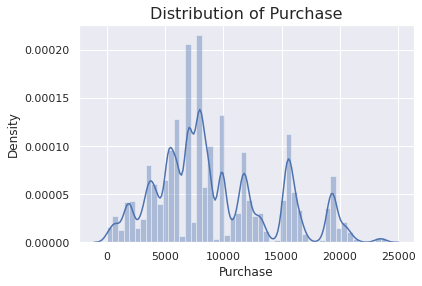

In [436]:
sns.distplot(train['Purchase'])
plt.title('Distribution of Purchase',fontsize=16)

### Bivarient

Text(0.5, 0, 'Gender')

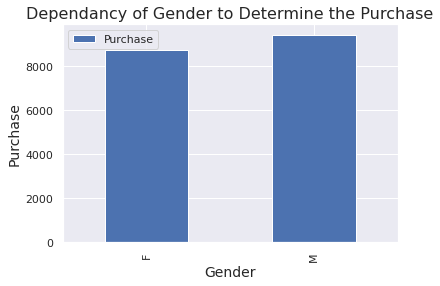

In [437]:
data=train.pivot_table(values='Purchase',index='Gender').plot(kind='bar')
plt.title('Dependancy of Gender to Determine the Purchase',fontsize=16)
plt.ylabel('Purchase',fontsize=14)
plt.xlabel('Gender',fontsize=14)

Text(0.5, 0, 'Age')

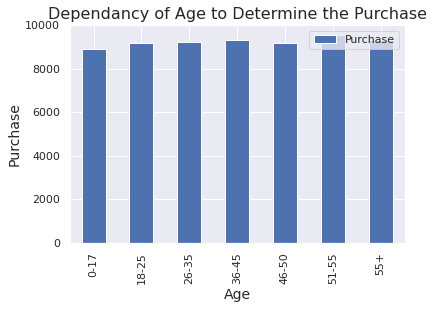

In [438]:
data=train.pivot_table(values='Purchase',index='Age').plot(kind='bar')
plt.title('Dependancy of Age to Determine the Purchase',fontsize=16)
plt.ylabel('Purchase',fontsize=14)
plt.xlabel('Age',fontsize=14)

Text(0.5, 0, 'Occupation')

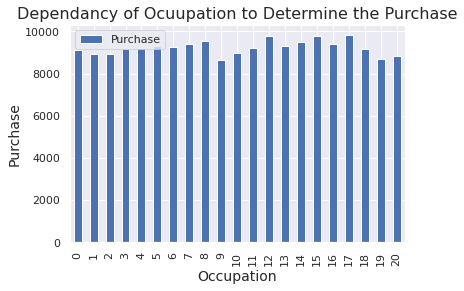

In [439]:
data=train.pivot_table(values='Purchase',index='Occupation').plot(kind='bar')

plt.title('Dependancy of Ocuupation to Determine the Purchase',fontsize=16)
plt.ylabel('Purchase',fontsize=14)
plt.xlabel('Occupation',fontsize=14)

Text(0.5, 0, 'City_Category')

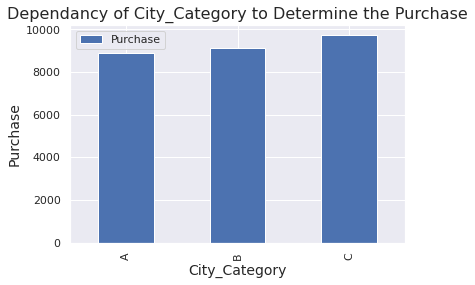

In [440]:
data=train.pivot_table(values='Purchase',index='City_Category').plot(kind='bar')
plt.title('Dependancy of City_Category to Determine the Purchase',fontsize=16)
plt.ylabel('Purchase',fontsize=14)
plt.xlabel('City_Category',fontsize=14)

Text(0.5, 0, 'City_Category')

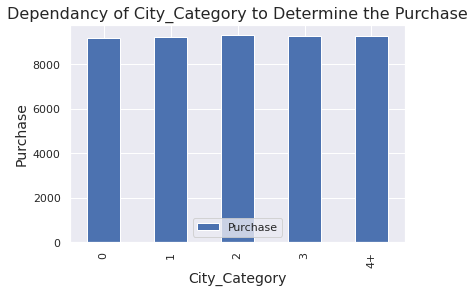

In [441]:
data=train.pivot_table(values='Purchase',index='Stay_In_Current_City_Years').plot(kind='bar')
plt.title('Dependancy of City_Category to Determine the Purchase',fontsize=16)
plt.ylabel('Purchase',fontsize=14)
plt.xlabel('City_Category',fontsize=14)

Text(0.5, 0, 'Marital_Status')

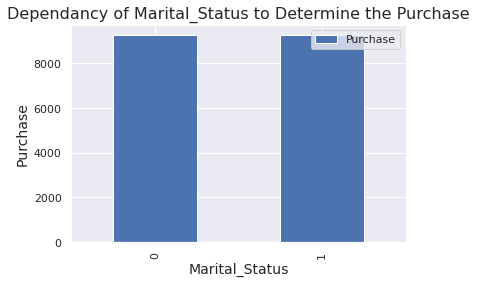

In [442]:
data=train.pivot_table(values='Purchase',index='Marital_Status').plot(kind='bar')
plt.title('Dependancy of Marital_Status to Determine the Purchase',fontsize=16)
plt.ylabel('Purchase',fontsize=14)
plt.xlabel('Marital_Status',fontsize=14)

Text(0.5, 0, 'Product_Category_1')

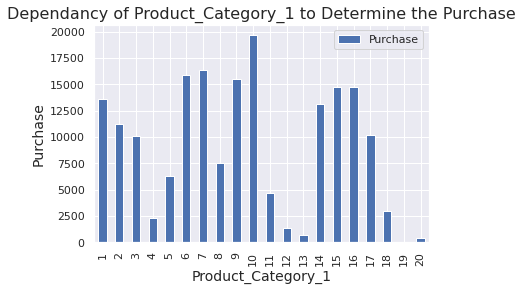

In [443]:
data=train.pivot_table(values='Purchase',index='Product_Category_1').plot(kind='bar')
plt.title('Dependancy of Product_Category_1 to Determine the Purchase',fontsize=16)
plt.ylabel('Purchase',fontsize=14)
plt.xlabel('Product_Category_1',fontsize=14)

Text(0.5, 0, 'Product_Category_2')

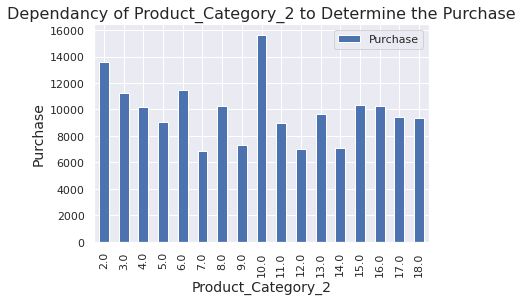

In [444]:
data=train.pivot_table(values='Purchase',index='Product_Category_2').plot(kind='bar')
plt.title('Dependancy of Product_Category_2 to Determine the Purchase',fontsize=16)
plt.ylabel('Purchase',fontsize=14)
plt.xlabel('Product_Category_2',fontsize=14)

Text(0.5, 0, 'Product_Category_3')

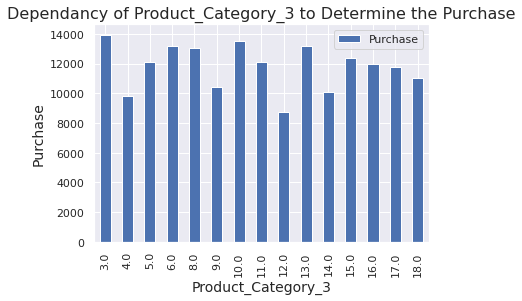

In [445]:
train.pivot_table(values='Purchase',index='Product_Category_3').plot(kind='bar')
plt.title('Dependancy of Product_Category_3 to Determine the Purchase',fontsize=16)
plt.ylabel('Purchase',fontsize=14)
plt.xlabel('Product_Category_3',fontsize=14)

## Correlation

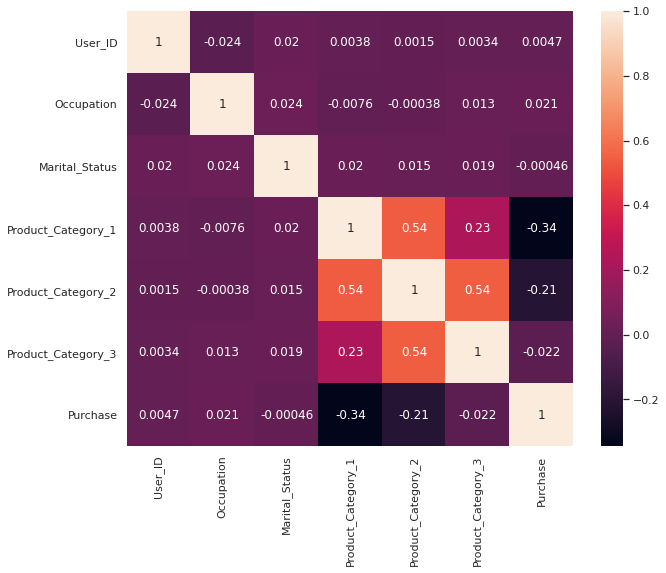

In [446]:
# Correlation
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True)

Observations-

1. Product_Category_1 is highly correlated with Purhcase and Product_category_2.

2. Product_category_2 highly correlated with purchase, product_category_3 and product_category_1.

3. product_category_3 is highly correlated with product_category_2

# Data Preprocessing

In [447]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [448]:
train['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [449]:
train.pivot_table(values='Purchase',index='Product_Category_2').sort_values(by='Purchase')

,Purchase
Product_Category_2,
7.0,6884.683706
12.0,6975.472504
14.0,7105.264916
9.0,7277.006851
11.0,8940.580515
5.0,9027.821574
18.0,9352.440433
17.0,9421.576577
13.0,9683.352388


In [450]:
train['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [451]:
train.pivot_table(values='Purchase',index='Product_Category_3').sort_values(by='Purchase')

,Purchase
Product_Category_3,
12.0,8715.512762
4.0,9794.386667
14.0,10052.594530
9.0,10431.697210
18.0,10993.980773
17.0,11769.943001
16.0,11981.890642
11.0,12091.437673
5.0,12117.786889


In [452]:
#fill na valeus
train['Product_Category_2'].fillna(10.0,inplace=True)

In [453]:
train['Product_Category_3'].fillna(3.0,inplace=True)

In [454]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [455]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,10.0,3.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,10.0,3.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,3.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,10.0,3.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,10.0,3.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,10.0,3.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,10.0,3.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,10.0,3.0,365


## Label Encoding

In [456]:
train['Gender']=train['Gender'].map({'M':1,'F':0})
train['City_Category']=train['City_Category'].map({'A':1,'B':2,'C':3})

In [457]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,1,2,0,3,10.0,3.0,8370
1,1000001,P00248942,0,0-17,10,1,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,1,2,0,12,10.0,3.0,1422
3,1000001,P00085442,0,0-17,10,1,2,0,12,14.0,3.0,1057
4,1000002,P00285442,1,55+,16,3,4+,0,8,10.0,3.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,51-55,13,2,1,1,20,10.0,3.0,368
550064,1006035,P00375436,0,26-35,1,3,3,0,20,10.0,3.0,371
550065,1006036,P00375436,0,26-35,15,2,4+,1,20,10.0,3.0,137
550066,1006038,P00375436,0,55+,1,3,2,0,20,10.0,3.0,365


In [458]:
train.drop(columns=['User_ID','Product_ID'],axis=1,inplace=True)

In [459]:
train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,1,2,0,3,10.0,3.0,8370
1,0,0-17,10,1,2,0,1,6.0,14.0,15200
2,0,0-17,10,1,2,0,12,10.0,3.0,1422
3,0,0-17,10,1,2,0,12,14.0,3.0,1057
4,1,55+,16,3,4+,0,8,10.0,3.0,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,51-55,13,2,1,1,20,10.0,3.0,368
550064,0,26-35,1,3,3,0,20,10.0,3.0,371
550065,0,26-35,15,2,4+,1,20,10.0,3.0,137
550066,0,55+,1,3,2,0,20,10.0,3.0,365


## Target Encoding

In [460]:
train.pivot_table(values='Purchase',index='Age').sort_values(by='Purchase',ascending=False)

,Purchase
Age,
51-55,9534.808031
55+,9336.280459
36-45,9331.350695
26-35,9252.690633
46-50,9208.625697
18-25,9169.663606
0-17,8933.464640


In [461]:
train['Age']=train['Age'].map({'51-55':9534,'55+':9336,'36-45':9331,'26-35':9252,'46-50':9208,'18-25':9169,'0-17':8933})

In [462]:
train.pivot_table(values='Purchase',index='Stay_In_Current_City_Years').sort_values(by='Purchase',ascending=False)

,Purchase
Stay_In_Current_City_Years,
2,9320.429810
3,9286.904119
4+,9275.598872
1,9250.145923
0,9180.075123


In [463]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].map({'2':9320,'3':9286,'4+':9275,'1':9250,'0':9180})

In [464]:
d1=train.groupby('Product_Category_1')['Purchase'].mean().to_dict()
d1

{1: 13606.218595506418,
 2: 11251.93538384177,
 3: 10096.705733933608,
 4: 2329.6594911937377,
 5: 6240.088178198273,
 6: 15838.478549789896,
 7: 16365.689599570009,
 8: 7498.958077682686,
 9: 15537.375609756098,
 10: 19675.570926829267,
 11: 4685.268456375839,
 12: 1350.8598935900684,
 13: 722.4006127230132,
 14: 13141.62573867367,
 15: 14780.451828298887,
 16: 14766.037037037036,
 17: 10170.759515570935,
 18: 2972.86432,
 19: 37.04179663131628,
 20: 370.48117647058825}

In [465]:
train['Product_Category_1']=train['Product_Category_1'].map(d1)

In [466]:
d2=train.groupby('Product_Category_2')['Purchase'].mean().to_dict()
d2

{2.0: 13619.356401243473,
 3.0: 11235.359570041608,
 4.0: 10215.192000623127,
 5.0: 9027.821574232896,
 6.0: 11503.551378598324,
 7.0: 6884.683706070287,
 8.0: 10273.259518162526,
 9.0: 7277.00685051818,
 10.0: 7658.720032148335,
 11.0: 8940.580515070043,
 12.0: 6975.472503617945,
 13.0: 9683.352388187257,
 14.0: 7105.264916164622,
 15.0: 10357.077691190067,
 16.0: 10295.681932724541,
 17.0: 9421.576576576577,
 18.0: 9352.440433212996}

In [467]:
train['Product_Category_2']=train['Product_Category_2'].map(d2)

In [468]:
d3=train.groupby('Product_Category_3')['Purchase'].mean().to_dict()
d3

{3.0: 8230.96800135466,
 4.0: 9794.386666666667,
 5.0: 12117.786889182375,
 6.0: 13194.311042944786,
 8.0: 13024.918882343576,
 9.0: 10431.697210467226,
 10.0: 13505.813441483198,
 11.0: 12091.437673130195,
 12.0: 8715.512762275579,
 13.0: 13185.118703059168,
 14.0: 10052.594530062948,
 15.0: 12339.369899689429,
 16.0: 11981.890642235569,
 17.0: 11769.943000838222,
 18.0: 10993.980773385181}

In [469]:
train['Product_Category_3']=train['Product_Category_3'].map(d3)

In [470]:
d4=train.groupby('Occupation')['Purchase'].mean().to_dict()
d4

{0: 9124.428587839973,
 1: 8953.193269514612,
 2: 8952.481683466225,
 3: 9178.593087818697,
 4: 9213.980251147868,
 5: 9333.149297856615,
 6: 9256.535691476296,
 7: 9425.728222819745,
 8: 9532.592496765847,
 9: 8637.74376092831,
 10: 8959.355375096675,
 11: 9213.84584843777,
 12: 9796.640238622149,
 13: 9306.351061076604,
 14: 9500.702771979933,
 15: 9778.891163173037,
 16: 9394.46434905995,
 17: 9821.478235896411,
 18: 9169.655844155845,
 19: 8710.62723082378,
 20: 8836.49490495203}

In [471]:
train['Occupation']=train['Occupation'].map(d4)

In [502]:
train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,8933,8959.355375,1,9320,0,10096.705734,7658.720032,8230.968001,8370
1,0,8933,8959.355375,1,9320,0,13606.218596,11503.551379,10052.594530,15200
2,0,8933,8959.355375,1,9320,0,1350.859894,7658.720032,8230.968001,1422
3,0,8933,8959.355375,1,9320,0,1350.859894,7105.264916,8230.968001,1057
4,1,9336,9394.464349,3,9275,0,7498.958078,7658.720032,8230.968001,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,9534,9306.351061,2,9250,1,370.481176,7658.720032,8230.968001,368
550064,0,9252,8953.193270,3,9286,0,370.481176,7658.720032,8230.968001,371
550065,0,9252,9778.891163,2,9275,1,370.481176,7658.720032,8230.968001,137
550066,0,9336,8953.193270,3,9320,0,370.481176,7658.720032,8230.968001,365


## Dividing Dependant and Independant variable

In [509]:
x=train.drop(columns='Purchase')
y=train[['Purchase']]

## Building Model

In [504]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [505]:
def train_model(model,X,y):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
  model.fit(x_train,y_train,)
  y_pred=model.predict(x_test)


  #cross validation
  cv=KFold()
  n_cross_score=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=cv)
  

  print('---------------------- Result ----------------------------')
  print('Cross validation score is:',np.sqrt(np.abs(np.mean(n_cross_score))))
  print('Root mean squared values is :',np.sqrt(mean_squared_error(y_test,y_pred)))



### 1. Linear Regression

In [476]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True)
train_model(model,x,y)

---------------------- Result ----------------------------
Cross validation score is: 3015.2002529209617
Root mean squared values is : 3018.7129770809865


### 2. Ridge

In [477]:
from sklearn.linear_model import Ridge
model=Ridge(normalize=True)
train_model(model,x,y)

---------------------- Result ----------------------------
Cross validation score is: 3565.9865047392263
Root mean squared values is : 3569.62510461793


### 3. Lasso

In [478]:
from sklearn.linear_model import Lasso
model=Lasso(normalize=True)
train_model(model,x,y)

---------------------- Result ----------------------------
Cross validation score is: 3100.1620913546585
Root mean squared values is : 3083.310775617283


## 4. Decision tree regressor

In [479]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=11)
train_model(model,x,y)

---------------------- Result ----------------------------
Cross validation score is: 2958.3203302252346
Root mean squared values is : 2954.803649256159


## 5. Random Forest Classifier

In [186]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=16)
train_model(model,x,y)

---------------------- Result ----------------------------
Cross validation score is: 2911.1974125807374
Root mean squared values is : 2915.0049039877


## 6. Gradient Boost Regressor

In [187]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
train_model(model,x,y)

---------------------- Result ----------------------------
Cross validation score is: 2973.583256601645
Root mean squared values is : 2977.621210505621


In [295]:
##Random forest gives low rmse and low cross validation score

In [480]:
test=pd.read_csv(r'/content/drive/MyDrive/data vidhya/Black Friday Sales Prediction/test.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [481]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [482]:
#fill na valeus
test['Product_Category_2'].fillna(10.0,inplace=True)
test['Product_Category_3'].fillna(3.0,inplace=True)

In [483]:
test['Gender']=test['Gender'].map({'M':1,'F':0})
test['City_Category']=test['City_Category'].map({'A':1,'B':2,'C':3})

In [484]:
test['Age']=test['Age'].map({'51-55':9534,'55+':9336,'36-45':9331,'26-35':9252,'46-50':9208,'18-25':9169,'0-17':8933})

In [485]:
test['Occupation']=test['Occupation'].map(d4)

In [486]:
test['Product_Category_1']=test['Product_Category_1'].map(d1)
test['Product_Category_2']=test['Product_Category_2'].map(d2)
test['Product_Category_3']=test['Product_Category_3'].map(d3)

In [488]:
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].map({'2':9320,'3':9286,'4+':9275,'1':9250,'0':9180})

In [489]:
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,9208,9425.728223,2,9320,1,13606.218596,8940.580515,8230.968001
1,1000009,P00113442,1,9252,9821.478236,3,9180,0,10096.705734,9027.821574,8230.968001
2,1000010,P00288442,0,9331,8953.193270,2,9275,1,6240.088178,7105.264916,8230.968001
3,1000010,P00145342,0,9331,8953.193270,2,9275,1,2329.659491,7277.006851,8230.968001
4,1000011,P00053842,0,9252,8953.193270,3,9250,0,2329.659491,9027.821574,8715.512762
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,9252,9778.891163,2,9275,1,7498.958078,7658.720032,8230.968001
233595,1006036,P00254642,0,9252,9778.891163,2,9275,1,6240.088178,10273.259518,8230.968001
233596,1006036,P00031842,0,9252,9778.891163,2,9275,1,13606.218596,9027.821574,8715.512762
233597,1006037,P00124742,0,9208,8953.193270,3,9275,0,19675.570927,10295.681933,8230.968001


In [495]:
tests=test.iloc[:,2:]

In [496]:
tests

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,9208,9425.728223,2,9320,1,13606.218596,8940.580515,8230.968001
1,1,9252,9821.478236,3,9180,0,10096.705734,9027.821574,8230.968001
2,0,9331,8953.193270,2,9275,1,6240.088178,7105.264916,8230.968001
3,0,9331,8953.193270,2,9275,1,2329.659491,7277.006851,8230.968001
4,0,9252,8953.193270,3,9250,0,2329.659491,9027.821574,8715.512762
...,...,...,...,...,...,...,...,...,...
233594,0,9252,9778.891163,2,9275,1,7498.958078,7658.720032,8230.968001
233595,0,9252,9778.891163,2,9275,1,6240.088178,10273.259518,8230.968001
233596,0,9252,9778.891163,2,9275,1,13606.218596,9027.821574,8715.512762
233597,0,9208,8953.193270,3,9275,0,19675.570927,10295.681933,8230.968001


In [516]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
model=RandomForestRegressor(max_depth=16)
model.fit(x_train,y_train)

In [523]:
pred=model.predict(tests)

In [524]:
pred

array([13731.46314913, 11016.66379946,  6486.6354777 , ...,
       13263.86252106, 18759.48120745,  2250.48533714])

In [525]:
Output=pd.DataFrame({'Purchase':pred,'User_ID':test['User_ID'],'Product_ID':test['Product_ID']})
Output

,Purchase,User_ID,Product_ID
0,13731.463149,1000004,P00128942
1,11016.663799,1000009,P00113442
2,6486.635478,1000010,P00288442
3,2481.921810,1000010,P00145342
4,2794.488073,1000011,P00053842
...,...,...,...
233594,7219.399093,1006036,P00118942
233595,6654.019365,1006036,P00254642
233596,13263.862521,1006036,P00031842
233597,18759.481207,1006037,P00124742


In [527]:
Output.to_csv(r'/content/drive/MyDrive/data vidhya/Black Friday Sales Prediction/Output.csv',index=False)